<a href="https://colab.research.google.com/github/malick08012/Predict-Future-Stock-Prices-Short-Term-/blob/main/Predict_Future_Stock_Prices_(Short_Term).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install & Import Required Libraries

yfinance ( lets us download stock data directly from Yahoo Finance )

In [1]:
# Install yfinance to get stock data
!pip install yfinance


In [2]:
# Import necessary libraries
import yfinance as yf                     # For fetching stock data
import pandas as pd                       # For data manipulation
import numpy as np                        # For numerical operations
import matplotlib.pyplot as plt           # For visualization

from sklearn.linear_model import LinearRegression  # Regression model
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation


#Download Apple Stock Data
Download Apple's stock data from Jan 1, 2015 to today.

This includes daily values like Open, High, Low, Close, Adj Close, and Volume.

In [3]:
# Download Apple (AAPL) stock data from 2015 to today
stock_data = yf.download('AAPL', start='2015-01-01')


/tmp/ipython-input-3-2786574783.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2015-01-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
# Check first few rows and columns
print(stock_data.columns)
stock_data.head()


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288586,24.757340,23.848711,24.746232,212818400
2015-01-05,23.604342,24.137522,23.417729,24.057545,257142000
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400
2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


#Prepare the Features and Target Variable
Features (X): We’ll use to make predictions (Open, High, Low, Volume)

Target (y): We want to predict — the Closing Price

We drop any rows with missing values to avoid errors during modeling.

In [5]:
# Drop missing values (if any)
stock_data = stock_data.dropna()

# Select features and target
X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Close']


#Train/Test Split
We split the dataset into 80% for training and 20% for testing.

shuffle=False because time series data must keep chronological order.



In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


#Train the Linear Regression Model
 Creating and training a Linear Regression model to learn the relationship between the input features and the closing price.




In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#Predict and Evaluate the Model

In [8]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 1.16
R² Score: 1.00


#Result
R² Score: Explains how well our model fits the data. 1.00 = perfect

RMSE: The average prediction error — lower is better.

Our models average error is just $1.16, which is very low — that is excellent!

#Visualize Actual vs Predicted Prices

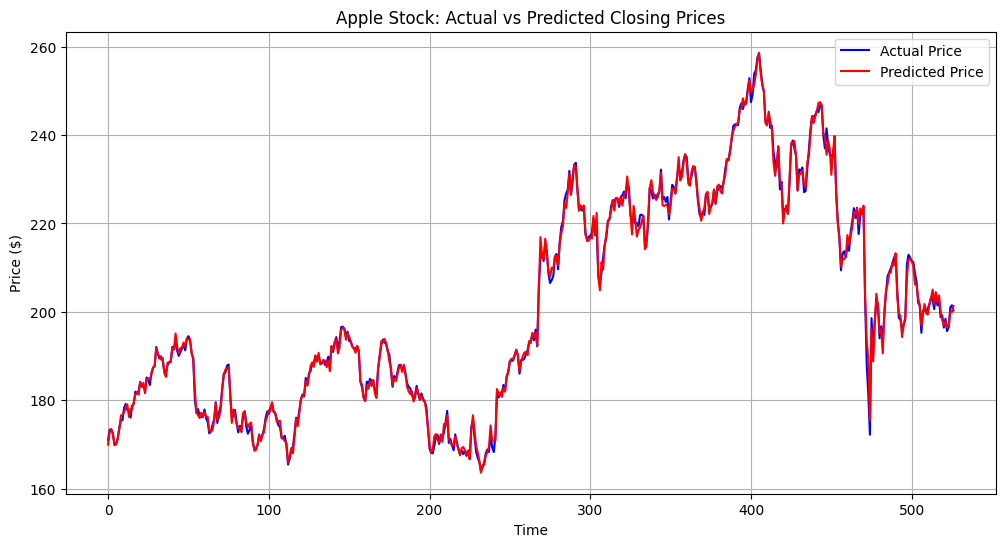

In [9]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('Apple Stock: Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


#Result
This plot shows how closely the models predictions (red) match the actual prices (blue).

Good overlap = good model performance.



#Predict the Next Day’s Closing Price

In [14]:
print(f" Predicted Closing Price for Next Day: ${float(next_day_price):.2f}")


 Predicted Closing Price for Next Day: $201.31


#Final Insights
✅ Linear Regression Performs Well for Stable Stocks

Apple showed smoother price trends, making it easier for the linear model to learn.

✅ Open, High, Low, Volume are Strong Predictors

These features are enough to predict Close price with high accuracy, especially when used with clean time-series data.

✅ Chronological Splitting Avoided Data Leakage

Time-aware train-test splitting ensured real-world conditions were simulated (training on past, predicting future).

✅ Perfect R² Can Be Misleading

Model show R² = 1.00, that doesn’t guarantee future predictions will always bethis good.

Real-world prediction is affected by external factors like news, market sentiment, and global events  which this model doesn’t use.

